# FINAL PROJECT

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [30]:
# Load clean data
rates = pd.read_csv('inputs/Clean_Data/Clean_Rates.csv')
sp500_ret = pd.read_csv('inputs/Clean_Data/Clean_sp500_ret.csv')
stock_tv = pd.read_csv('inputs/Clean_Data/Clean_stock_tv.csv')
Vbilx = pd.read_csv('inputs/Clean_Data/Clean_Vbilx.csv')
Vbirx= pd.read_csv('inputs/Clean_Data/Clean_Vbirx.csv')

In [31]:
sp500_ret = sp500_ret.rename(columns = {'date': 'Date','Daily Returns' : 'SP_daily_ret', 'Price': 'SP_daily_price' })

In [32]:
Vbirx
Vbirx = Vbirx.rename(columns = {'Daily Returns' : 'VBIRX_daily_ret', 'Price': 'VBIRX_daily_price' })
Vbirx = Vbirx.rename(columns = {'Daily Price': 'VBIRX_daily_price' })
Vbirx

,VBIRX_daily_ret,VBIRX_daily_price,Date
0,0.000000,9.148480,2015-01-02
1,0.000954,9.157207,2015-01-05
2,0.000953,9.165930,2015-01-06
3,0.000951,9.174648,2015-01-07
4,-0.000950,9.165930,2015-01-08
...,...,...,...
2086,0.000000,9.990000,2023-04-18
2087,-0.001001,9.980000,2023-04-19
2088,0.002004,10.000000,2023-04-20
2089,0.000000,10.000000,2023-04-21


In [33]:
Vbilx = Vbilx.rename(columns = {'Daily Price': 'VBILX_daily_price', 'Daily Returns' : 'VBLIX_daily_ret' })
Vbilx

,VBLIX_daily_ret,VBILX_daily_price,Date
0,0.004348,9.135244,2015-01-05
1,0.004329,9.174787,2015-01-06
2,0.000000,9.174787,2015-01-07
3,-0.002586,9.151057,2015-01-08
4,0.003458,9.182699,2015-01-09
...,...,...,...
2085,0.001938,10.340000,2023-04-18
2086,-0.001934,10.320000,2023-04-19
2087,0.003876,10.360000,2023-04-20
2088,-0.001930,10.340000,2023-04-21


In [34]:
sp500_ret = sp500_ret.rename(columns = {'returns' : 'sp500_ret'})
sp500_ret

,Date,S&P_500,sp500_ret
0,2015-01-05,2020.58,-0.018278
1,2015-01-06,2002.61,-0.008893
2,2015-01-07,2025.90,0.011630
3,2015-01-08,2062.14,0.017888
4,2015-01-09,2044.81,-0.008404
...,...,...,...
2085,2023-04-18,4154.87,0.000855
2086,2023-04-19,4154.52,-0.000084
2087,2023-04-20,4129.79,-0.005953
2088,2023-04-21,4133.52,0.000903


In [35]:
stock_tv
stock_tv.drop_duplicates(inplace=True)
stock_tv = stock_tv.rename(columns = {'Value' : 'sp500_tv'})
stock_tv

,Date,sp500_tv
0,12/2/15,1088000.0
1,12/3/15,1379000.0
2,12/4/15,1308000.0
3,12/7/15,712744.0
4,12/8/15,670998.0
...,...,...
489,3/31/23,3293000.0
490,4/3/23,2494000.0
491,4/4/23,2687000.0
492,4/5/23,2311000.0


## Merging data 

In [36]:
Vbilx.columns

Index(['VBLIX_daily_ret', 'VBILX_daily_price', 'Date'], dtype='object')

In [37]:
Vbilx =Vbilx.reset_index()

In [38]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = Vbilx.loc[(Vbilx['Date'] == row['Date'])].index[0]
        forward_returns = Vbilx.loc[filing_index:filing_index+15, 'VBLIX_daily_ret']
        negative_returns = Vbilx.loc[filing_index-15:filing_index, 'VBLIX_daily_ret']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'Vbilx: T-T+15'] = forward_cumret
        rates.loc[index, 'Vbilx: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 742.07it/s]


In [39]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = Vbirx.loc[(Vbirx['Date'] == row['Date'])].index[0]
        forward_returns = Vbirx.loc[filing_index:filing_index+15, 'VBIRX_daily_ret']
        negative_returns = Vbirx.loc[filing_index-15:filing_index, 'VBIRX_daily_ret']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'Vbirx: T-T+15'] = forward_cumret
        rates.loc[index, 'Vbirx: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 537.63it/s]


In [40]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = stock_tv.loc[(stock_tv['Date'] == row['Date'])].index[0]
        forward_returns = stock_tv.loc[filing_index:filing_index+15, 'sp500_tv']
        negative_returns = stock_tv.loc[filing_index-15:filing_index, 'sp500_tv']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'SP500 Volume: T-T+15'] = forward_cumret
        rates.loc[index, 'SP500 Volume: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 1937.83it/s]


In [41]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = sp500_ret.loc[(sp500_ret['Date'] == row['Date'])].index[0]
        forward_returns = sp500_ret.loc[filing_index:filing_index+15, 'sp500_ret']
        negative_returns = sp500_ret.loc[filing_index-15:filing_index, 'sp500_ret']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'SP500: T-T+15'] = forward_cumret
        rates.loc[index, 'SP500: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 655.81it/s]


In [42]:
rates

,Date,Increase,Decrease,Tgt_level,Vbilx: T-T+15,Vbilx: T-15-T,Vbirx: T-T+15,Vbirx: T-15-T,SP500: T-T+15,SP500: T-15-T
0,2015-12-17,25.0,0.0,0.25.0.50,0.005319,0.003081,0.001916,2.006382e-03,-0.025045,-0.004179
1,2016-12-15,25.0,0.0,0.50.0.75,0.002681,0.000000,0.000962,0.000000e+00,0.004105,-0.000554
2,2017-03-16,25.0,0.0,0.75.1.00,0.002671,0.002655,0.000960,9.562656e-04,-0.004943,0.002933
3,2017-06-15,25.0,0.0,1.00.1.25,-0.003469,0.002627,-0.000954,9.552127e-04,0.006374,0.007255
4,2017-12-14,25.0,0.0,1.25.1.50,-0.002629,0.002634,-0.000962,9.613581e-04,0.010256,0.000920
5,2018-03-22,25.0,0.0,1.50.1.75,0.000909,-0.001813,0.000000,2.220446e-16,-0.019683,0.002620
6,2018-06-14,25.0,0.0,1.75.2.00,0.002754,0.008295,0.000978,3.917965e-03,-0.000677,-0.001142
7,2018-09-27,25.0,0.0,2.00.2.25,0.001472,-0.001823,0.000784,-9.756973e-04,0.006407,-0.003971
8,2018-12-20,25.0,0.0,2.25.2.50,0.000911,0.004348,0.001947,1.862547e-03,-0.062171,0.029081
9,2019-08-01,0.0,25.0,2.00.2.25,0.015385,-0.001714,0.006648,2.220446e-16,-0.045511,0.007093


In [43]:
rates.to_csv('inputs/Final_Data/Final_Dataset.csv', index=True)

In [45]:
# Set date column as index in each dataset
Vbilx.set_index('Date', inplace=True)
Vbirx.set_index('Date', inplace=True)
sp500_ret.set_index('Date', inplace=True)

# Merge datasets 
merged_data = pd.concat([Vbilx['VBILX_daily_price'],Vbilx['VBLIX_daily_ret'], Vbirx['VBIRX_daily_price'], Vbirx['VBIRX_daily_ret'], sp500_ret['sp500_ret']], axis=1, keys=['VBILX Price','VBILX Returns', 'VBIRX Price', 'VBIRX Returns', 'sp500_ret'])
merged_data.reset_index(inplace=True)
merged_data = merged_data.rename(columns={'index':'Date'})

In [47]:
merged_data.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,sp500_ret
0,2015-01-05,9.135244,0.004348,9.157207,0.000954,-0.018278
1,2015-01-06,9.174787,0.004329,9.165930,0.000953,-0.008893
2,2015-01-07,9.174787,0.000000,9.174648,0.000951,0.011630
3,2015-01-08,9.151057,-0.002586,9.165930,-0.000950,0.017888
4,2015-01-09,9.182699,0.003458,9.183368,0.001902,-0.008404


## Merge for FOMC Meeting days

In [48]:
filtered_dates = rates['Date'].tolist()
merged_data_filtered = merged_data[merged_data['Date'].isin(filtered_dates)]

In [49]:
Data_with_rates = pd.merge(merged_data_filtered, rates, on='Date', how='left')

In [50]:
Data_with_rates  = Data_with_rates .rename(columns={'Increase': 'rates increase', 'Decrease': 'rates decrease', 'Tgt_level': 'rates Tgt_level'})
Data_with_rates.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,sp500_ret,rates increase,rates decrease,rates Tgt_level,Vbilx: T-T+15,Vbilx: T-15-T,Vbirx: T-T+15,Vbirx: T-15-T,SP500: T-T+15,SP500: T-15-T
0,2015-12-17,9.178914,0.003546,9.217265,0.000000,-0.015040,25.0,0.0,0.25.0.50,0.005319,0.003081,0.001916,0.002006,-0.025045,-0.004179
1,2016-12-15,9.314664,-0.002681,9.303718,-0.000962,0.003883,25.0,0.0,0.50.0.75,0.002681,0.000000,0.000962,0.000000,0.004105,-0.000554
2,2017-03-16,9.455314,-0.001782,9.369160,-0.000960,-0.001627,25.0,0.0,0.75.1.00,0.002671,0.002655,0.000960,0.000956,-0.004943,0.002933
3,2017-06-15,9.772592,-0.001735,9.448400,-0.000954,-0.002240,25.0,0.0,1.00.1.25,-0.003469,0.002627,-0.000954,0.000955,0.006374,0.007255
4,2017-12-14,9.808612,-0.000876,9.456397,-0.000962,-0.004071,25.0,0.0,1.25.1.50,-0.002629,0.002634,-0.000962,0.000961,0.010256,0.000920


## Correlation matrix 

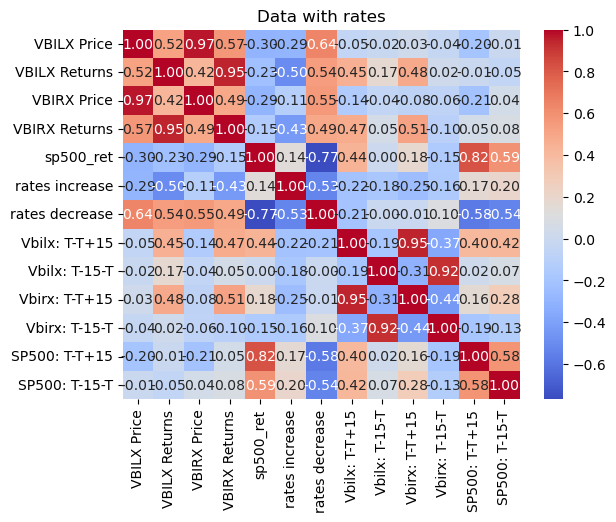

In [51]:
corr_matrix = Data_with_rates.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Data with rates')
plt.show()

## T+15 / T-15 FOMC Meetings

In [52]:
#change to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
rates['Date'] = pd.to_datetime(rates['Date'])

fifteen_days = pd.DataFrame()
filtered_dates = rates['Date'].tolist()


# Loop 
for date in filtered_dates:
    # Convert date to datetime object
    match_date = pd.to_datetime(date)
    # Filter the merged data to the 15 days prior and after the matching date
    prior_15 = merged_data.loc[(merged_data['Date'] >= match_date - pd.Timedelta(days=15)) & (merged_data['Date'] <= match_date)]
    post_15 = merged_data.loc[(merged_data['Date'] > match_date) & (merged_data['Date'] <= match_date + pd.Timedelta(days=15))]
    # Combine the filtered dataframes and append to the results dataframe
    filtered_data = pd.concat([prior_15, post_15])
    fifteen_days = pd.concat([fifteen_days, filtered_data])

# Sort results and drop and duplicates
fifteen_days.sort_values(by='Date', inplace=True)
fifteen_days.drop_duplicates(inplace=True)
fifteen_days.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,sp500_ret
230,2015-12-02,9.251893,-0.001750,9.252578,-0.000954,-0.010996
231,2015-12-03,9.178914,-0.007888,9.234923,-0.001908,-0.014374
232,2015-12-04,9.195133,0.001767,9.234923,0.000000,0.020526
233,2015-12-07,9.219457,0.002645,9.243752,0.000956,-0.006990
234,2015-12-08,9.219457,0.000000,9.243752,0.000000,-0.006490


#### NOTE: the date is not exact because there is no data for some days. for example 2015-12-12 and 2015-12-13 are not in the data. I just think it's important to note that! 

In [53]:
Data_with_rates.columns

Index(['Date', 'VBILX Price', 'VBILX Returns', 'VBIRX Price', 'VBIRX Returns',
       'sp500_ret', 'rates increase', 'rates decrease', 'rates Tgt_level',
       'Vbilx: T-T+15', 'Vbilx: T-15-T', 'Vbirx: T-T+15', 'Vbirx: T-15-T',
       'SP500: T-T+15', 'SP500: T-15-T'],
      dtype='object')

## Event Study Graphs

### Data Sources

- FOMC Rates 
        Source:https://www.federalreserve.gov/monetarypolicy/openmarket.htm
        
- Index Returns
    Source: https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview
    
- Stock Trading Volume¶
  Source: https://ycharts.com/indicators/cboe_spx_volume
  
- VBLAX data 
    Source: Yahoo Finance (import yfinance as yf)
    
- VBIRX data 
    Source: Yahoo Finance (import yfinance as yf)